In [2]:
## Make this notebook as same as of the fintech app notebook in detailing
## Also add the source of the data

# Car Price Prediction

The solution is divided into the following sections:

* 1.Exploratory Data Analysis
* 2.Feature Engineering
* 3.Data Preprocessing
* 4.Model Building and Evaluation

## Problem Statement

## Data Description

* Car_ID	-		Unique id of each observation (Interger)		
* Symboling 	-		Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is  probably pretty safe.(Categorical) 		
* carCompany	-		Name of car company (Categorical)		
* fueltype		-	Car fuel type i.e gas or diesel (Categorical)		
* aspiration	-		Aspiration used in a car (Categorical)		
* doornumber	-		Number of doors in a car (Categorical)		
* carbody		-	body of car (Categorical)		
* drivewheel	-		type of drive wheel (Categorical)		
* enginelocation-			Location of car engine (Categorical)		
* wheelbase		-	Weelbase of car (Numeric)		
* carlength		-	Length of car (Numeric)		
* carwidth		-	Width of car (Numeric)		
* carheight		-	height of car (Numeric)		
* curbweight	-		The weight of a car without occupants or baggage. (Numeric)		
* enginetype	-		Type of engine. (Categorical)		
* cylindernumber-			cylinder placed in the car (Categorical)		
* enginesize	-		Size of car (Numeric)		
* fuelsystem	-		Fuel system of car (Categorical)		
* boreratio		-	Boreratio of car (Numeric)		
* stroke		-	Stroke or volume inside the engine (Numeric)		
* compressionratio -			compression ratio of car (Numeric)		
* horsepower	-		Horsepower (Numeric)		
* peakrpm		-	car peak rpm (Numeric)		
* citympg		-	Mileage in city (Numeric)		
* highwaympg	-		Mileage on highway (Numeric)		
* price(Dependent variable) -			Price of car (Numeric)		


## Exploratory Data Analysis

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)
pd.set_option("display.float", "{:.2f}".format)

### Reading Dataset

In [2]:
data = pd.read_csv('CarPrice_Assignment.csv')
data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.80,177.30,66.30,53.10,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.00
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.80,192.70,71.40,55.70,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.00
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.80,192.70,71.40,55.70,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.00
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.80,192.70,71.40,55.90,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.00
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.50,178.20,67.90,52.00,3053,ohc,five,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.17


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

* From the info we can see that it is a very small dataset.

### Summary Statistics

In [4]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,59.32,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,1.00,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,103.00,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,205.00,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


In [5]:
## Displaying all the columns and the values for categorical variables

for column in data.columns:
    print(f"{column}: {data[column].nunique()}")
    if data[column].nunique() < 10:
        print(f"{data[column].value_counts()}")
    print("\n\n")

car_ID: 205



symboling: 6
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64



CarName: 147



fueltype: 2
gas       185
diesel     20
Name: fueltype, dtype: int64



aspiration: 2
std      168
turbo     37
Name: aspiration, dtype: int64



doornumber: 2
four    115
two      90
Name: doornumber, dtype: int64



carbody: 5
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64



drivewheel: 3
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64



enginelocation: 2
front    202
rear       3
Name: enginelocation, dtype: int64



wheelbase: 53



carlength: 75



carwidth: 44



carheight: 49



curbweight: 171



enginetype: 7
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64



cylindernumber: 7
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindern

In [6]:
data.car_ID.nunique()

205

In [7]:
data.set_index('car_ID', inplace=True)
data.index.name = None
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00


* Now the 'car_ID' is the new index

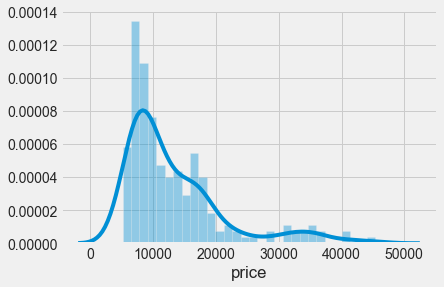

In [8]:
sns.distplot(data.price, bins=30)
plt.show()

* We can infer that the distribution of the plot is skewed.

In [9]:
print(data['price'].skew())
print(data['price'].kurtosis())

1.7776781560914454
3.051647871396399


## Categorical Features

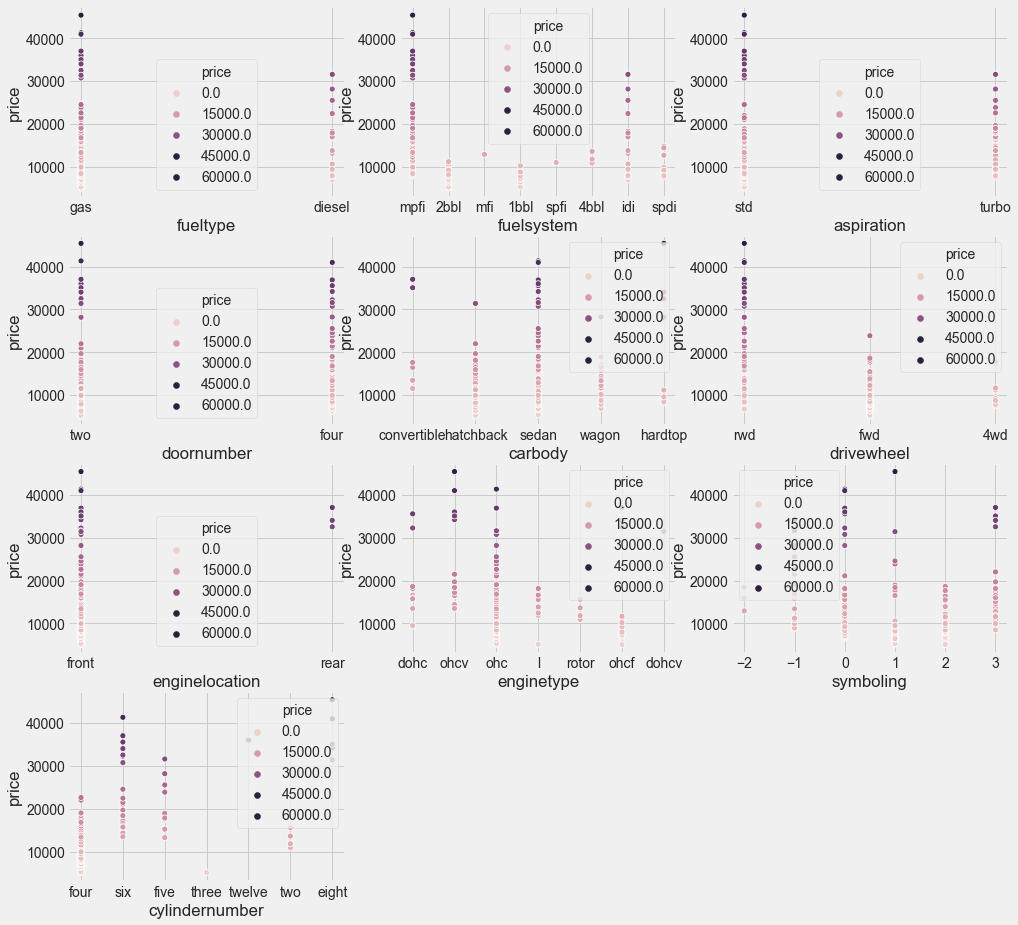

In [10]:
cat_col = ['fueltype', 'fuelsystem', 'aspiration', 'doornumber', 'carbody', 
                'drivewheel', 'enginelocation', 'enginetype', 'symboling', 
                'cylindernumber']
plt.figure(figsize=(15, 15))
for i, column in enumerate(cat_col, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(column, 'price', data=data, hue='price')

From the plot we can infer the following:

* Gas vehicles are found to be more highly priced compared to diesel.
* mpfi fuelsystem is found more in high end vehicles, so we can assume the quality of this system to be good.
* sedan and convertibles are more costly than other car bodies.
* rwd drivewheel is found more in costly vehicles.
* Only a few rear engined vehicles are seen. We would need to check on the reason.
* Greater the number of cylinders, higher the price of the car.

## Continuous Features

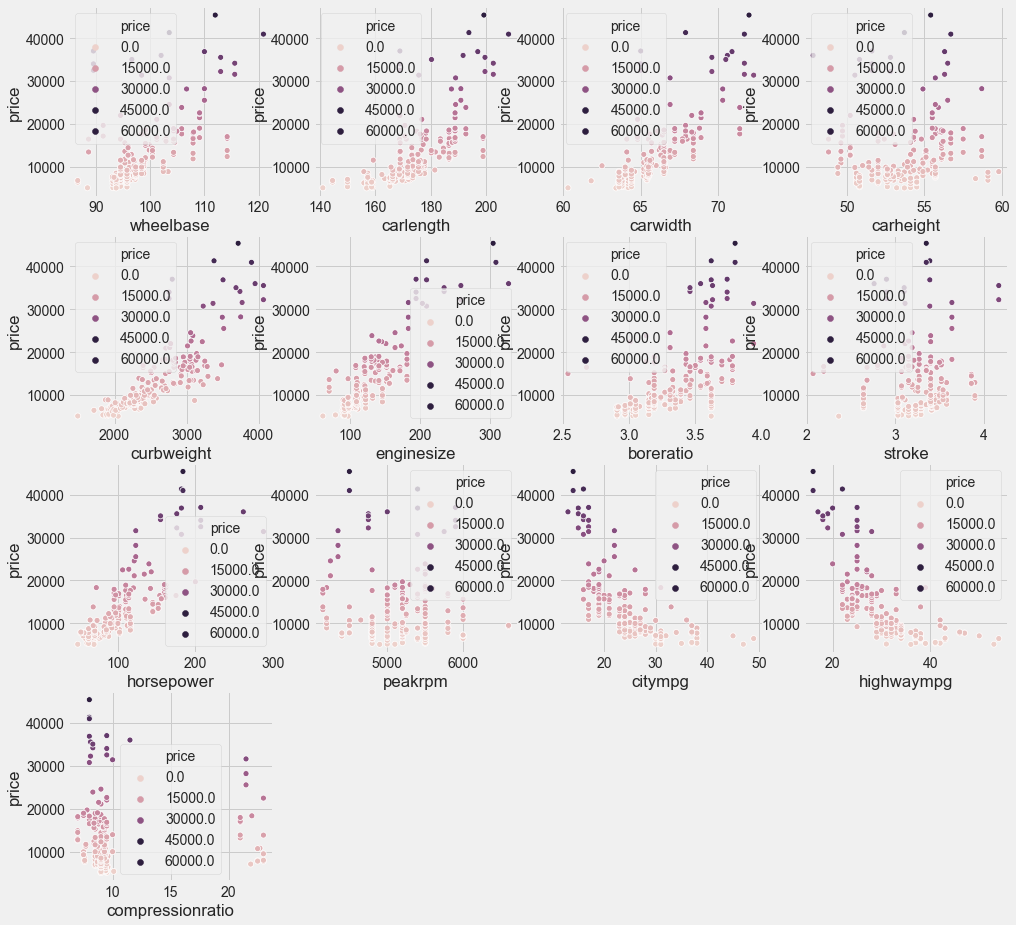

In [11]:
num_col = ['wheelbase', 'carlength', 'carwidth', 'carheight', 
                 'curbweight', 'enginesize', 'boreratio', 'stroke', 
                 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 
                 'compressionratio']
plt.figure(figsize=(15, 15))
for i, column in enumerate(num_col, 1):
    plt.subplot(4, 4, i)
    sns.scatterplot(column, 'price', data=data, hue='price')

From the plots we can infer the following:

* Almost all of the features are positively correlated to the price variable except for highwaympg, citympg, compressionratio as these variables are negatively correlated.

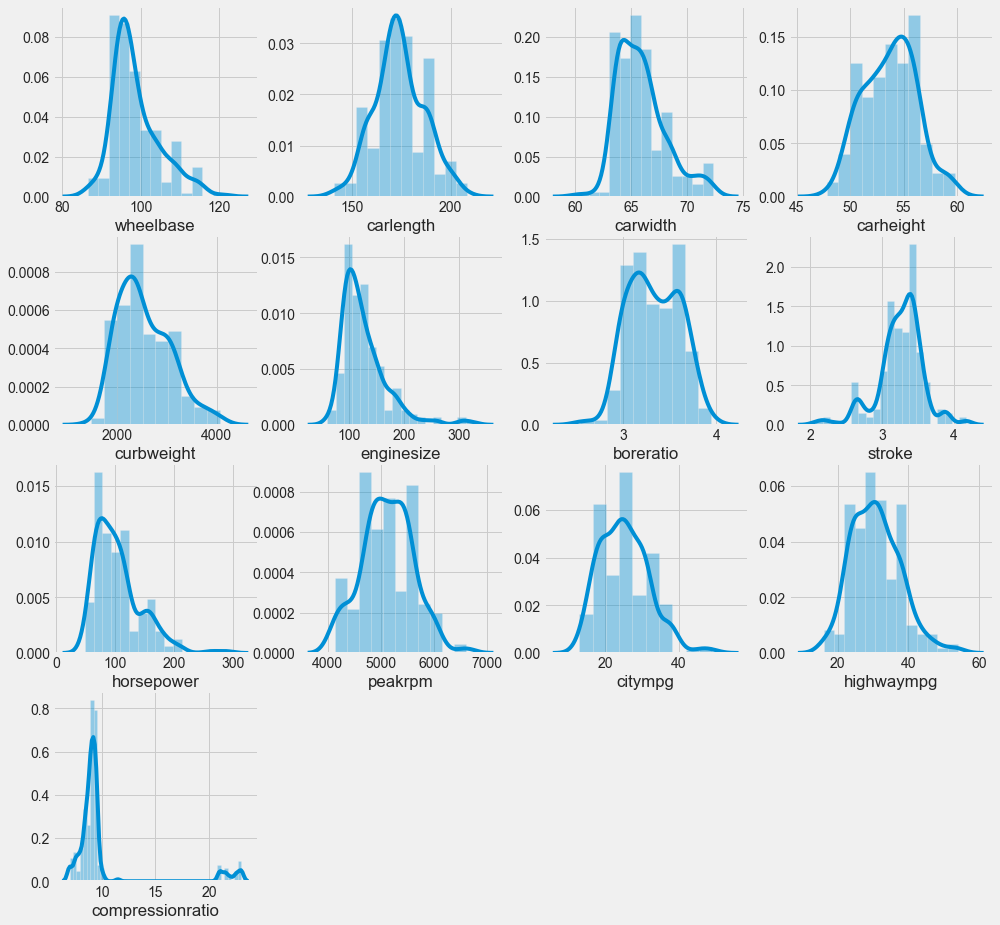

In [12]:
num_col = ['wheelbase', 'carlength', 'carwidth', 'carheight', 
                 'curbweight', 'enginesize', 'boreratio', 'stroke', 
                 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 
                 'compressionratio']
plt.figure(figsize=(15, 15))
for i, column in enumerate(num_col, 1):
    plt.subplot(4, 4, i)
    sns.distplot(data[column])

* It is nice to see a gaussian distribution in most of the features. 

## Correlation

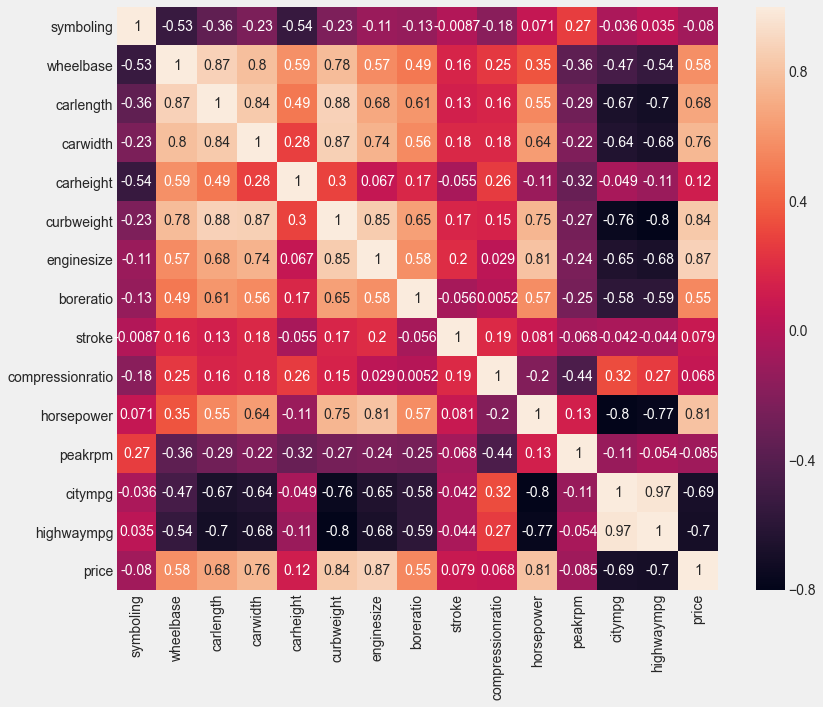

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

The heatmap shows some useful insights:

Correlation of price with independent variables:

* Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower (note that all of these variables represent the size/weight/engine power of the car).

* Price is negatively correlated to citympg and highwaympg (-0.70 approximately). This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower (think Maruti Alto/Swift type of cars, which are designed to be affordable by the middle class, who value mileage more than horsepower/size of car etc)

Correlation among independent variables:

* Many independent variables are highly correlated (look at the top-left part of matrix): wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight', and are positively correlated

Therfore, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, as they suffer more from multicollinearity).

## Feature Engineering

In [14]:
data.CarName.nunique()

147

In [15]:
data['brand'] = data.CarName.str.split(' ', expand=True)[0].str.lower()
data.brand.value_counts()

toyota         31
nissan         18
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
jaguar          3
chevrolet       3
alfa-romero     3
maxda           2
renault         2
vw              2
porcshce        1
toyouta         1
vokswagen       1
mercury         1
Name: brand, dtype: int64

In [16]:
data['brand'] = data.brand.str.replace('toyouta', 'toyota')
data['brand'] = data.brand.str.replace('porcshce', 'porsche')
data['brand'] = data.brand.str.replace('maxda', 'mazda')
data['brand'] = data.brand.str.replace('vw', 'volkswagen')
data['brand'] = data.brand.str.replace('vokswagen', 'volkswagen')

data.brand.value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Name: brand, dtype: int64

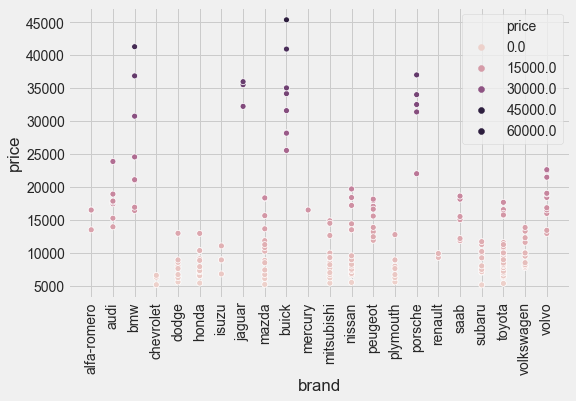

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot('brand', 'price', data=data, hue='price')
plt.xticks(rotation = 90)
plt.show()

In [18]:
data.brand.nunique()

22

In [19]:
data.drop('CarName', axis=1, inplace=True)

## Data Preprocessing

In [20]:
object_features = data.select_dtypes(include=('object')).columns.tolist()
object_features

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'brand']

In [21]:
data_1 = pd.get_dummies(data, columns=object_features, drop_first=True, dtype='uint8')

In [22]:
data_1.dtypes

symboling                  int64
wheelbase                float64
carlength                float64
carwidth                 float64
carheight                float64
curbweight                 int64
enginesize                 int64
boreratio                float64
stroke                   float64
compressionratio         float64
horsepower                 int64
peakrpm                    int64
citympg                    int64
highwaympg                 int64
price                    float64
fueltype_gas               uint8
aspiration_turbo           uint8
doornumber_two             uint8
carbody_hardtop            uint8
carbody_hatchback          uint8
carbody_sedan              uint8
carbody_wagon              uint8
drivewheel_fwd             uint8
drivewheel_rwd             uint8
enginelocation_rear        uint8
enginetype_dohcv           uint8
enginetype_l               uint8
enginetype_ohc             uint8
enginetype_ohcf            uint8
enginetype_ohcv            uint8
enginetype

In [23]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    int64  
 1   wheelbase              205 non-null    float64
 2   carlength              205 non-null    float64
 3   carwidth               205 non-null    float64
 4   carheight              205 non-null    float64
 5   curbweight             205 non-null    int64  
 6   enginesize             205 non-null    int64  
 7   boreratio              205 non-null    float64
 8   stroke                 205 non-null    float64
 9   compressionratio       205 non-null    float64
 10  horsepower             205 non-null    int64  
 11  peakrpm                205 non-null    int64  
 12  citympg                205 non-null    int64  
 13  highwaympg             205 non-null    int64  
 14  price                  205 non-null    float64
 15  fuelty

In [24]:
## Train Test Split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data_1.drop('price', axis=1)
y = data_1.price

* Here Feature Scaling is necessary as some continuous features are higher in magnitude and this can cause a problem while model building especially in linear models and KNN.

In [25]:
## Standard Scaling

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [26]:
## Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [27]:
## Function to evaluate

from sklearn import metrics

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print("=========Result=======")
    print(f'MAE:\t\t {mae:.4f}')
    print(f'MSE:\t\t {mse:.4f}')
    print(f'RMSE:\t\t {rmse:.4f}')
    print(f'R2 Square:\t {r2_square:.4f}')

## Model Building

We are going to use the following linear models for model building:

* 1. Linear Regression
* 2. Random Forest Regresser
* 3. K Nearest Neighbours
* 4. Decision Tree Regressor
* 5. Ridge Regression
* 6. Lasso Regression


## Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()
model_1.fit(X_train, y_train)
prediction1 = model_1.predict(X_test)

print_evaluate(y_test,prediction1)

=========Result=======
MAE:		 1766.7397
MSE:		 8163965.0646
RMSE:		 2857.2653
R2 Square:	 0.8764


## Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor

model_2 = RandomForestRegressor(random_state =0,n_estimators=100)
model_2.fit(X_train,y_train)
prediction2 = model_2.predict(X_test)

print_evaluate(y_test,prediction2)

=========Result=======
MAE:		 1617.8015
MSE:		 5924056.4133
RMSE:		 2433.9385
R2 Square:	 0.9103


## KNN

In [30]:
from sklearn.neighbors import KNeighborsRegressor

model_3 = KNeighborsRegressor()
model_3.fit(X_train,y_train)
prediction3 = model_3.predict(X_test)

print_evaluate(y_test,prediction3)

=========Result=======
MAE:		 2710.0769
MSE:		 22344556.1662
RMSE:		 4727.0029
R2 Square:	 0.6616


In [31]:
a_index = list(range(1,40))
a=pd.Series()
x= list(range(1,40))
for i in list(range(1,40)):
    model=KNeighborsRegressor(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    a= a.append(pd.Series(np.sqrt(metrics.mean_squared_error(y_test, prediction))))    

print('Accuracies for different values of n are:',a.values,'with the min value as ',a.values.min())

Accuracies for different values of n are: [3877.95838943 3274.25348647 3592.41405049 4247.9449879  4727.00287351
 4784.41533444 5119.73972489 5083.26426577 5227.73624065 5268.52988189
 5347.14823593 5409.67273196 5324.44629002 5356.30198968 5424.22670979
 5433.2708561  5406.44827354 5405.48046524 5444.70099051 5465.9228771
 5497.22354868 5553.04487001 5566.70724919 5602.32600313 5612.38124323
 5687.09040412 5721.21560459 5762.37890015 5826.26212825 5894.32254932
 5950.59356132 6006.34247093 6032.12289011 6050.02785849 6096.84030708
 6116.62772143 6155.22862973 6198.26305684 6225.76198107] with the min value as  3274.253486474705


## Decision Tree

In [32]:
from sklearn.tree import DecisionTreeRegressor

model_4 = DecisionTreeRegressor()
model_4.fit(X_train,y_train)
prediction4 = model_4.predict(X_test)

print_evaluate(y_test,prediction4)

=========Result=======
MAE:		 1963.1532
MSE:		 8789501.5766
RMSE:		 2964.7094
R2 Square:	 0.8669


## Ridge Regression

In [33]:
from sklearn.linear_model import Ridge

model_5 = Ridge()
model_5.fit(X_train,y_train)
prediction5 = model_5.predict(X_test)

print_evaluate(y_test,prediction5)

=========Result=======
MAE:		 1726.5668
MSE:		 6862536.0549
RMSE:		 2619.6443
R2 Square:	 0.8961


## Lasso Regression

In [34]:
from sklearn.linear_model import Lasso

model_6 = Lasso(max_iter= 1e5)
model_6.fit(X_train,y_train)
prediction6 = model_6.predict(X_test)

print_evaluate(y_test,prediction6)

=========Result=======
MAE:		 1915.3215
MSE:		 9425038.6388
RMSE:		 3070.0226
R2 Square:	 0.8573


* From the above models, we can see that Linear Regression, Ridge Regression and Random Forest models performed better.

## Hyper Parameter Tuning

Hyper Parameter Tuning can be done to change the learning rate of the algorithm and get a better model.

In [196]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict

## Random Forest Regressor

In [197]:
param = {'max_depth':[3, None], 'min_samples_split':[2, 3, 10], 
              'min_samples_leaf':[1, 3, 10], 'bootstrap':[True, False], 
              'n_estimators':[100, 200,300,400,500,600,700,800,900, 1000,1100,1300, 1500]}

#gd1 = GridSearchCV(estimator = RandomForestRegressor(random_state=0), param_grid = param, cv=3, verbose=1, n_jobs = -1, scoring = "neg_mean_squared_error")
#gd1.fit(X,y)

print(gd1.best_score_)
print(gd1.best_estimator_)


Fitting 3 folds for each of 468 candidates, totalling 1404 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1404 out of 1404 | elapsed:  7.9min finished


-12292398.091165766
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)


* Best estimator is found to be: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=800,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [199]:
estimator1 = gd1.best_estimator_
pred1 = cross_val_predict(estimator1,X, y, cv=3)

In [200]:
pred1 = pd.DataFrame(pred1,columns= ['RF_prediction'])
pred1

,RF_prediction
0,10064.65
1,10064.65
2,14238.73
3,10036.21
4,14904.57
...,...
200,18161.80
201,17851.62
202,18827.33
203,17393.95


In [201]:
pred1.to_csv('RF_prediction.csv')

In [202]:
print("\n RMSE Score\n",np.sqrt(metrics.mean_squared_error(y,pred1)))
print("\n R2 Score\n",metrics.r2_score(y,pred1))


 RMSE Score
 3506.051638405482

 R2 Score
 0.8064507365660855


## Ridge Regression

In [203]:
alpha = np.array([1,0.1,0.01,0.001,0.0001])

#gd2 = GridSearchCV(estimator = Ridge(), param_grid = dict(alpha = alpha), cv=3, verbose=1, n_jobs = -1, scoring = "neg_mean_squared_error")
#gd2.fit(X,y)

print(gd2.best_score_)
print(gd2.best_estimator_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
-21732980.718695093
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished


In [204]:
estimator2 = gd2.best_estimator_
pred2 = cross_val_predict(estimator2,X, y, cv=3)

In [205]:
pred2 = pd.DataFrame(pred2,columns= ['Ridge_prediction'])
pred2

,Ridge_prediction
0,14890.55
1,14890.55
2,13903.44
3,10233.28
4,13385.01
...,...
200,20959.22
201,23042.01
202,18645.48
203,24634.07


In [206]:
pred2.to_csv('Ridge_prediction.csv')

In [207]:
print("\n RMSE Score\n",np.sqrt(metrics.mean_squared_error(y,pred2)))
print("\n R2 Score\n",metrics.r2_score(y,pred2))


 RMSE Score
 4661.864510975676

 R2 Score
 0.6578045732711977


## Lasso Regression

In [208]:
alpha = np.array([1,0.1,0.01,0.001,0.0001])

#gd3 = GridSearchCV(estimator = Lasso(), param_grid = dict(alpha = alpha), cv=3, verbose=1, n_jobs = -1, scoring = "neg_mean_squared_error")
#gd3.fit(X,y)

print(gd3.best_score_)
print(gd3.best_estimator_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.1s remaining:    0.0s


-28979244.62075338
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished


In [209]:
estimator3 = gd3.best_estimator_
pred3 = cross_val_predict(estimator3,X, y, cv=3)

In [210]:
pred3 = pd.DataFrame(pred3,columns= ['Lasso_prediction'])
pred3

,Lasso_prediction
0,15439.44
1,15439.44
2,12993.95
3,9352.56
4,13303.34
...,...
200,22541.19
201,24728.28
202,17619.66
203,27695.54


In [211]:
pred3.to_csv('Lasso_prediction.csv')

In [212]:
print("\n RMSE Score\n",np.sqrt(metrics.mean_squared_error(y,pred3)))
print("\n R2 Score\n",metrics.r2_score(y,pred3))


 RMSE Score
 5383.237373621321

 R2 Score
 0.543708932169303


* We can see that after tuning also, there is a huge change in all the algorithm. So, we can proceed with the Random Forest Regressor which gives the least error. We can see that by doing cross validation and cross validation predict, we can get the average performance of the model when subjected to different data.

## Feature Selection with RFE

In [77]:
X_train.shape

(143, 64)

In [76]:
from sklearn.feature_selection import RFE

nof_list = np.arange(1,64)
score_list = []
high_score = 0
nof = 0


for i in range(len(nof_list)):
    rfe = RFE(model_2, i)
    rfe.fit(X_train,y_train)
    score = rfe.score(X_test,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]

print("Optimum number of features: %d" % nof)
print("Score with %d features: %f" % (nof, high_score))


ValueError: Found array with 0 feature(s) (shape=(143, 0)) while a minimum of 1 is required.

In [71]:

rfe = RFE(model_2,45)
rfe.fit(X_train,y_train)

print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
 False  True  True  True  True False  True  True  True False False False
  True  True  True False  True False  True  True  True False False False
 False False False  True False  True  True  True False False False  True
  True  True False  True]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  3
 19  1  1  1  1  4  1  1  1 20 15 11  1  1  1 18  1  7  1  1  1  5 12 14
  8  2 13  1 16  1  1  1  9 10 17  1  1  1  6  1]


In [72]:
cols = list(data_1.drop('price',axis =1).columns)
col_name = pd.Series(rfe.support_, index = cols)
select_feat = col_name[col_name == True].index
print(select_feat)

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mpfi', 'fuelsystem_spfi', 'brand_audi',
       'brand_bmw', 'brand_mazda', 'brand_mitsubishi', 'brand_nissan',
       'brand_peugeot', 'brand_saab', 'brand_subaru', 'brand_toyota',
       'brand_volvo'],
      dtype='object')


In [74]:
for i in range(data_1.shape[1]):
    print('Column Name: %s \t\t, Selected %s,\t\t Rank: %.1f' % (data_1.columns[i], rfe.support_[i], rfe.ranking_[i]))

Column Name: symboling 		, Selected True,		 Rank: 1.0
Column Name: wheelbase 		, Selected True,		 Rank: 1.0
Column Name: carlength 		, Selected True,		 Rank: 1.0
Column Name: carwidth 		, Selected True,		 Rank: 1.0
Column Name: carheight 		, Selected True,		 Rank: 1.0
Column Name: curbweight 		, Selected True,		 Rank: 1.0
Column Name: enginesize 		, Selected True,		 Rank: 1.0
Column Name: boreratio 		, Selected True,		 Rank: 1.0
Column Name: stroke 		, Selected True,		 Rank: 1.0
Column Name: compressionratio 		, Selected True,		 Rank: 1.0
Column Name: horsepower 		, Selected True,		 Rank: 1.0
Column Name: peakrpm 		, Selected True,		 Rank: 1.0
Column Name: citympg 		, Selected True,		 Rank: 1.0
Column Name: highwaympg 		, Selected True,		 Rank: 1.0
Column Name: price 		, Selected True,		 Rank: 1.0
Column Name: fueltype_gas 		, Selected True,		 Rank: 1.0
Column Name: aspiration_turbo 		, Selected True,		 Rank: 1.0
Column Name: doornumber_two 		, Selected True,		 Rank: 1.0
Column Name: c

IndexError: index 64 is out of bounds for axis 0 with size 64

In [75]:
pred4 = rfe.predict(X_test)

print_evaluate(y_test, pred4)

=========Result=======
MAE:		 1594.8236
MSE:		 5889221.8245
RMSE:		 2426.7719
R2 Square:	 0.9108


* We can see that taking 45 features gives us a better score.

## Conclusion

* Our built model is not able to give a good and accurate prediction at predicting the car price and shows high variance as it gives different accuracy with different set of data.

* This may also be due to the low amount of data that is provided for training.

* At this stage the model will be of no use in production as it is unable to give accuract predictions. Further study and training is required.